## Notebook Purpose: Evaluate Uncertainty in velocity and Lag Dh/Dt for the six study glaciers

In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'


In [2]:
import numpy as np 
import geopandas as gpd
import matplotlib.pyplot as plt
from imview import pltlib
import pandas as pd
from pygeotools.lib import warplib,geolib,iolib,malib,filtlib,timelib
import os,sys,glob,shutil
from velocity_proc import glac_dyn, constants, velocity_filter, velocity_timeseries
from demcoreg import dem_mask

/swbuild/sbhusha1/miniconda3/envs/bhushanGDAL3/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%matplotlib inline

In [4]:
%cd /nobackup/sbhusha1/chapter2/

/nobackupp11/sbhusha1/chapter2


## Imja Lhotse Shar

In [5]:
lag_DhDt = 'imja/20230223/imja_farinotti_2015-10-02_to_2016-10-29_lag_smb_products/imja_farinotti_2015-10-02_to_2016-10-29_lagrangian_dhdt.tif'
vx_fn = 'imja/20230223/20151002_combined_hs_masked__20161029_combined_hs_masked_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20151002_combined_hs_masked__20161029_combined_hs_masked_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1.tif'
vy_fn = 'imja/20230223/20151002_combined_hs_masked__20161029_combined_hs_masked_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20151002_combined_hs_masked__20161029_combined_hs_masked_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1.tif'
lag_ds = iolib.fn_getds(lag_DhDt)
lag_ma = iolib.ds_getma(lag_ds)
vx_ds,vy_ds = [iolib.fn_getds(fn) for fn in [vx_fn,vy_fn]]
vx_ma,vy_ma = [iolib.ds_getma(ds) for ds in [vx_ds,vy_ds]]
ice_mask_lag = dem_mask.get_icemask(lag_ds)
ice_mask_vel = dem_mask.get_icemask(vx_ds)

Masking glaciers
Found glacier shp: /nobackupp11/sbhusha1/reference_data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs
Specified output srs: +proj=utm +zone=45 +datum=WGS84 +units=m +no_defs
Masking glaciers
Found glacier shp: /nobackupp11/sbhusha1/reference_data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs
Specified output srs: +proj=utm +zone=45 +datum=WGS84 +units=m +no_defs


In [6]:
lagdhdt_error = np.ma.array(lag_ma,mask=~ice_mask_lag)
vx_error = np.ma.array(vx_ma,mask=~ice_mask_vel)
vy_error = np.ma.array(vy_ma,mask=~ice_mask_vel)

In [7]:
malib.get_stats_dict(lagdhdt_error)

{'count': 4691348,
 'min': -140.0492401123047,
 'max': 176.77316284179688,
 'ptp': 316.8223876953125,
 'mean': -0.22415820564608305,
 'std': 4.019243275623134,
 'nmad': 0.6901303683578968,
 'med': -0.022252527996897697,
 'median': -0.022252527996897697,
 'p16': -1.1049060821533203,
 'p84': 0.7402371168136597,
 'spread': 0.92257159948349,
 'mode': 0.04813811928033829}

In [8]:
malib.get_stats_dict(vx_error)

{'count': 4354379,
 'min': -58.68559646606445,
 'max': 42.67161178588867,
 'ptp': 101.35720825195312,
 'mean': -0.27533567019907784,
 'std': 1.33736962778499,
 'nmad': 0.6839320631504059,
 'med': -0.15352970361709595,
 'median': -0.15352970361709595,
 'p16': -0.7494380927085876,
 'p84': 0.4672153234481812,
 'spread': 0.6083267080783844,
 'mode': -0.5670943260192871}

In [9]:
malib.get_stats_dict(vy_error)

{'count': 4353730,
 'min': -54.59107971191406,
 'max': 49.465274810791016,
 'ptp': 104.05635070800781,
 'mean': -0.23043816798764025,
 'std': 1.3030222447754038,
 'nmad': 0.5436589386999606,
 'med': -0.25955986976623535,
 'median': -0.25955986976623535,
 'p16': -0.6740884876251221,
 'p84': 0.5010731911659241,
 'spread': 0.5875808393955231,
 'mode': 0.6300998330116272}

In [10]:
malib.get_stats_dict(np.ma.array(np.ma.sqrt(vx_ma**2+vy_ma**2),mask=~ice_mask_vel))

{'count': 4353521,
 'min': 0.0008163755992427468,
 'max': 65.39877319335938,
 'ptp': 65.39795684814453,
 'mean': 0.9872125986593402,
 'std': 1.625165396283811,
 'nmad': 0.3362079407572746,
 'med': 0.6851529479026794,
 'median': 0.6851529479026794,
 'p16': 0.40234506726264957,
 'p84': 1.1389938592910767,
 'spread': 0.3683243960142135,
 'mode': 0.6683856248855591}

<Axes: >

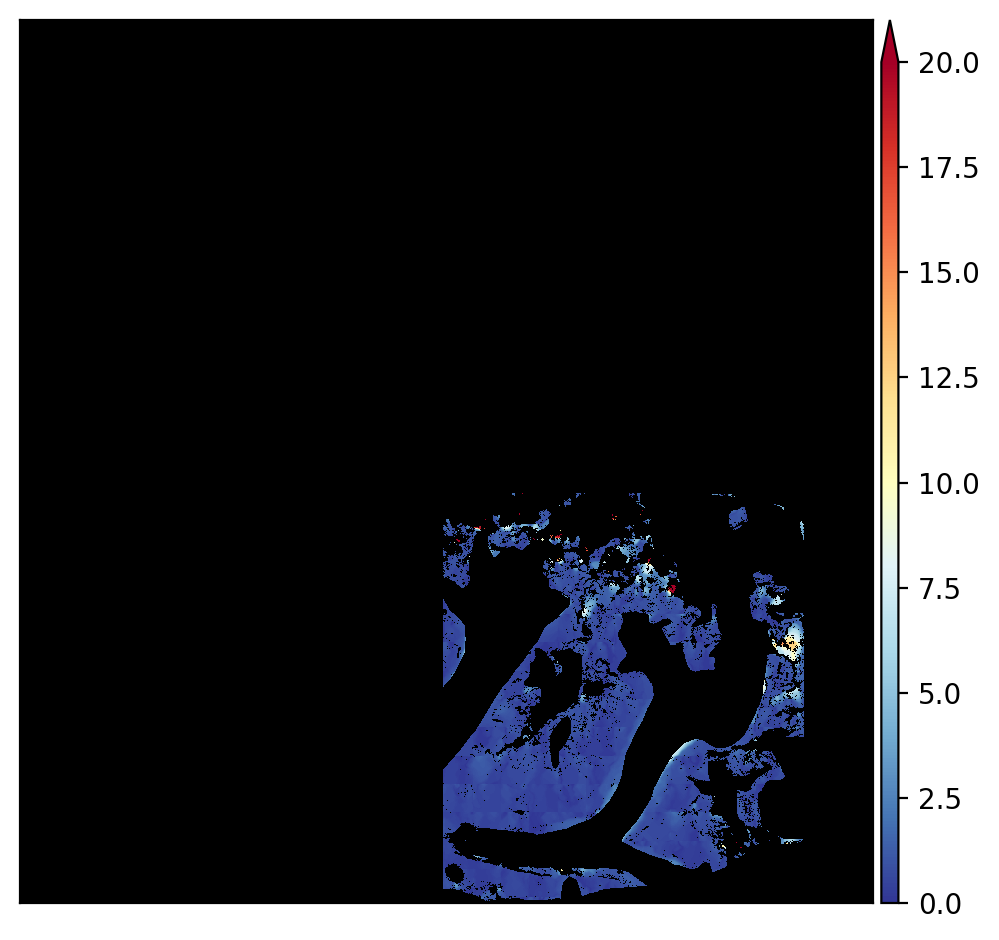

In [12]:
f,ax = plt.subplots()
pltlib.iv(np.ma.array(np.ma.sqrt(vx_ma**2+vy_ma**2),mask=~ice_mask_vel),ax=ax,cmap='RdYlBu_r',clim=(0,20))

<Axes: >

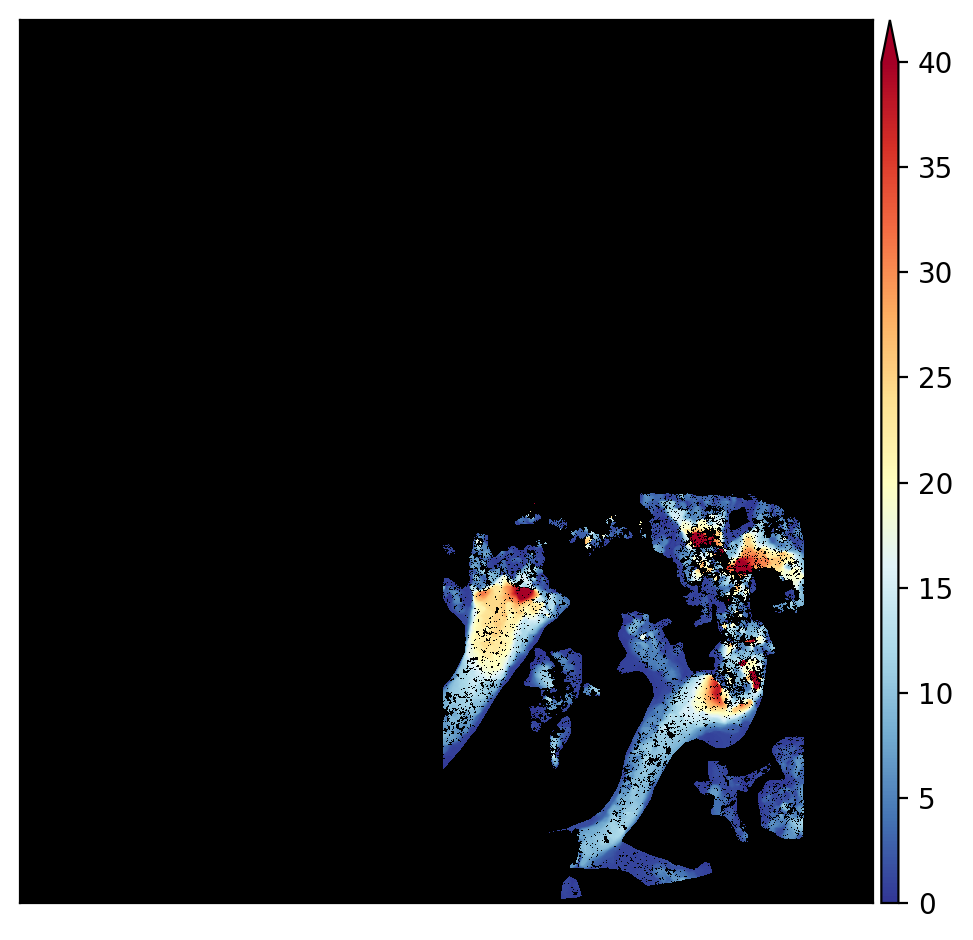

In [13]:
f,ax = plt.subplots()
pltlib.iv(np.ma.array(np.ma.sqrt(vx_ma**2+vy_ma**2),mask=ice_mask_vel),ax=ax,cmap='RdYlBu_r',clim=(0,40))

## Khumbu and Black Changri Nup (same pairs of DEMs were used in the analysis)

In [14]:
lag_DhDt = 'changrinup/20230217/khumbu_farinotti_2015-11-02_to_2016-10-25_lag_smb_products/khumbu_farinotti_2015-11-02_to_2016-10-25_lagrangian_dhdt.tif'
vx_fn = 'changrinup/20230217/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1.tif'
vy_fn = 'changrinup/20230217/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20151102_combined_hs__20161025_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1.tif'
lag_ds = iolib.fn_getds(lag_DhDt)
lag_ma = iolib.ds_getma(lag_ds)
vx_ds,vy_ds = [iolib.fn_getds(fn) for fn in [vx_fn,vy_fn]]
vx_ma,vy_ma = [iolib.ds_getma(ds) for ds in [vx_ds,vy_ds]]
ice_mask_lag = dem_mask.get_icemask(lag_ds)
ice_mask_vel = dem_mask.get_icemask(vx_ds)

Masking glaciers
Found glacier shp: /nobackupp11/sbhusha1/reference_data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs
Specified output srs: +proj=utm +zone=45 +datum=WGS84 +units=m +no_defs
Masking glaciers
Found glacier shp: /nobackupp11/sbhusha1/reference_data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs
Specified output srs: +proj=utm +zone=45 +datum=WGS84 +units=m +no_defs


In [15]:
lagdhdt_error = np.ma.array(lag_ma,mask=~ice_mask_lag)
vx_error = np.ma.array(vx_ma,mask=~ice_mask_vel)
vy_error = np.ma.array(vy_ma,mask=~ice_mask_vel)

In [16]:
malib.get_stats_dict(lagdhdt_error)

{'count': 13351197,
 'min': -97.62132263183594,
 'max': 151.50184631347656,
 'ptp': 249.1231689453125,
 'mean': 0.2067447879943709,
 'std': 4.041485396623034,
 'nmad': 0.47860388565659523,
 'med': 0.018930446356534958,
 'median': 0.018930446356534958,
 'p16': -0.56143718957901,
 'p84': 0.7801336646080017,
 'spread': 0.6707854270935059,
 'mode': 0.004483526572585106}

In [17]:
malib.get_stats_dict(np.ma.array(np.ma.sqrt(vx_ma**2+vy_ma**2),mask=~ice_mask_vel))

{'count': 11926816,
 'min': 8.302189235109836e-05,
 'max': 72.6885757446289,
 'ptp': 72.68849182128906,
 'mean': 0.8964056629225734,
 'std': 1.7456570421580768,
 'nmad': 0.2841402063667774,
 'med': 0.5674543976783752,
 'median': 0.5674543976783752,
 'p16': 0.33718107342720033,
 'p84': 0.955692422389984,
 'spread': 0.3092556744813918,
 'mode': 0.5226913690567017}

## Ngozumpa

In [18]:
lag_DhDt = 'ngozumpa/20230217/ngozumpa_farinotti_2012-12-23_to_2015-01-15_lag_smb_products/ngozumpa_farinotti_2012-12-23_to_2015-01-15_lagrangian_dhdt.tif'
vx_fn = 'ngozumpa/20230217/20121223_combined_hs__20150115_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20121223_combined_hs__20150115_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1.tif'
vy_fn = 'ngozumpa/20230217/20121223_combined_hs__20150115_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20121223_combined_hs__20150115_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1.tif'
lag_ds = iolib.fn_getds(lag_DhDt)
lag_ma = iolib.ds_getma(lag_ds)
vx_ds,vy_ds = [iolib.fn_getds(fn) for fn in [vx_fn,vy_fn]]
vx_ma,vy_ma = [iolib.ds_getma(ds) for ds in [vx_ds,vy_ds]]
ice_mask_lag = dem_mask.get_icemask(lag_ds)
ice_mask_vel = dem_mask.get_icemask(vx_ds)

Masking glaciers
Found glacier shp: /nobackupp11/sbhusha1/reference_data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs
Specified output srs: +proj=utm +zone=45 +datum=WGS84 +units=m +no_defs
Masking glaciers
Found glacier shp: /nobackupp11/sbhusha1/reference_data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs
Specified output srs: +proj=utm +zone=45 +datum=WGS84 +units=m +no_defs


In [19]:
lagdhdt_error = np.ma.array(lag_ma,mask=~ice_mask_lag)
vx_error = np.ma.array(vx_ma,mask=~ice_mask_vel)
vy_error = np.ma.array(vy_ma,mask=~ice_mask_vel)

In [20]:
malib.get_stats_dict(lagdhdt_error)

{'count': 37872695,
 'min': -117.79817199707031,
 'max': 73.73641967773438,
 'ptp': 191.5345916748047,
 'mean': -0.04455869818558814,
 'std': 1.6744937059760459,
 'nmad': 0.31576757554113866,
 'med': 0.022743383422493935,
 'median': 0.022743383422493935,
 'p16': -0.31082624197006226,
 'p84': 0.35583919286727905,
 'spread': 0.33333271741867065,
 'mode': 0.009713320061564445}

In [21]:
malib.get_stats_dict(np.ma.array(np.ma.sqrt(vx_ma**2+vy_ma**2),mask=~ice_mask_vel))

{'count': 35007919,
 'min': 1.9596660422394052e-05,
 'max': 37.77238082885742,
 'ptp': 37.772361755371094,
 'mean': 0.5334232653113067,
 'std': 0.9835467247989516,
 'nmad': 0.1629099442899227,
 'med': 0.43238869309425354,
 'median': 0.43238869309425354,
 'p16': 0.2660534381866455,
 'p84': 0.6003537845611571,
 'spread': 0.16715017318725578,
 'mode': 0.48100724816322327}

## Langtang

In [22]:
lag_DhDt = 'langtang/20230223/langtang_farinotti_2015-02-22_to_2016-01-07_lag_smb_products/langtang_farinotti_2015-02-22_to_2016-01-07_lagrangian_dhdt.tif'
vx_fn = 'langtang/20230223/20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1.tif'
vy_fn = 'langtang/20230223/20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20150222_combined_hs__20160107_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1.tif'
lag_ds = iolib.fn_getds(lag_DhDt)
lag_ma = iolib.ds_getma(lag_ds)
vx_ds,vy_ds = [iolib.fn_getds(fn) for fn in [vx_fn,vy_fn]]
vx_ma,vy_ma = [iolib.ds_getma(ds) for ds in [vx_ds,vy_ds]]
ice_mask_lag = dem_mask.get_icemask(lag_ds)
ice_mask_vel = dem_mask.get_icemask(vx_ds)

Masking glaciers
Found glacier shp: /nobackupp11/sbhusha1/reference_data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs
Specified output srs: +proj=utm +zone=45 +datum=WGS84 +units=m +no_defs
Masking glaciers
Found glacier shp: /nobackupp11/sbhusha1/reference_data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs
Specified output srs: +proj=utm +zone=45 +datum=WGS84 +units=m +no_defs


In [23]:
lagdhdt_error = np.ma.array(lag_ma,mask=~ice_mask_lag)
vx_error = np.ma.array(vx_ma,mask=~ice_mask_vel)
vy_error = np.ma.array(vy_ma,mask=~ice_mask_vel)

In [24]:
malib.get_stats_dict(lagdhdt_error)

{'count': 20307639,
 'min': -100.52250671386719,
 'max': 240.0504608154297,
 'ptp': 340.5729675292969,
 'mean': -0.7168776432633002,
 'std': 3.8250122120026533,
 'nmad': 1.3948988482832907,
 'med': -0.40673166513442993,
 'median': -0.40673166513442993,
 'p16': -2.2498743534088135,
 'p84': 0.8045241832733154,
 'spread': 1.5271992683410645,
 'mode': 0.03463923558592796}

In [25]:
malib.get_stats_dict(np.ma.array(np.ma.sqrt(vx_ma**2+vy_ma**2),mask=~ice_mask_vel))

{'count': 18043407,
 'min': 0.0007203106069937348,
 'max': 96.69966125488281,
 'ptp': 96.69894409179688,
 'mean': 1.9583537517106484,
 'std': 2.308163609210689,
 'nmad': 0.5251224355459213,
 'med': 1.4187451601028442,
 'median': 1.4187451601028442,
 'p16': 0.9837526035308838,
 'p84': 2.6918158531188965,
 'spread': 0.8540316247940063,
 'mode': 1.2270952463150024}

## Lirung

In [26]:
lag_DhDt = 'lirung/202320218/lirung_farinotti_2016-11-06_to_2017-12-22_lag_smb_products/lirung_farinotti_2016-11-06_to_2017-12-22_lagrangian_dhdt.tif'
vx_fn = 'lirung/202320218/20161106_combined_hs__20171222_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20161106_combined_hs__20171222_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vx_skiprate_1.tif'
vy_fn = 'lirung/202320218/20161106_combined_hs__20171222_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm/20161106_combined_hs__20171222_combined_hs_mgm_disp_9spm_spm_ker15_corr_kernel9px_resmin_txm_vy_skiprate_1.tif'
lag_ds = iolib.fn_getds(lag_DhDt)
lag_ma = iolib.ds_getma(lag_ds)
vx_ds,vy_ds = [iolib.fn_getds(fn) for fn in [vx_fn,vy_fn]]
vx_ma,vy_ma = [iolib.ds_getma(ds) for ds in [vx_ds,vy_ds]]
ice_mask_lag = dem_mask.get_icemask(lag_ds)
ice_mask_vel = dem_mask.get_icemask(vx_ds)

Masking glaciers
Found glacier shp: /nobackupp11/sbhusha1/reference_data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs
Specified output srs: +proj=utm +zone=45 +datum=WGS84 +units=m +no_defs
Masking glaciers
Found glacier shp: /nobackupp11/sbhusha1/reference_data/rgi60/regions/rgi60_merge.shp
Input shp srs: +proj=longlat +datum=WGS84 +no_defs
Specified output srs: +proj=utm +zone=45 +datum=WGS84 +units=m +no_defs


In [27]:
malib.get_stats_dict(lagdhdt_error)

{'count': 20307639,
 'min': -100.52250671386719,
 'max': 240.0504608154297,
 'ptp': 340.5729675292969,
 'mean': -0.7168776432633002,
 'std': 3.8250122120026533,
 'nmad': 1.3948988482832907,
 'med': -0.40673166513442993,
 'median': -0.40673166513442993,
 'p16': -2.2498743534088135,
 'p84': 0.8045241832733154,
 'spread': 1.5271992683410645,
 'mode': 0.03463923558592796}

In [28]:
malib.get_stats_dict(np.ma.array(np.ma.sqrt(vx_ma**2+vy_ma**2),mask=~ice_mask_vel))

{'count': 9119784,
 'min': 6.483667675638571e-05,
 'max': 70.59840393066406,
 'ptp': 70.59834289550781,
 'mean': 1.2315739583728307,
 'std': 1.9039549857532192,
 'nmad': 0.42959003641605376,
 'med': 0.8365452289581299,
 'median': 0.8365452289581299,
 'p16': 0.45410444021224977,
 'p84': 1.4253809118270873,
 'spread': 0.4856382358074187,
 'mode': 0.284611314535141}